 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [414]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [504]:
# Reading whale returns
whale_returns = Path('whale_returns.csv')
whale_df = pd.read_csv(whale_returns, index_col= "Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [505]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [506]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [509]:
# Reading algorithmic returns
algo_returns = Path('algo_returns.csv')
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head(7)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285


In [510]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [511]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [512]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [514]:
# Reading S&P 500 Closing Prices
sp500_returns = Path('sp500_history.csv')
sp500_returns_df = pd.read_csv(sp500_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [515]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [516]:
sp500_returns_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [517]:
# Fix Data Types
def amount_str_to_float(amt):
    '''
    Convert amt from string/object type to float
    by removing '$', ','
    '''
    amt_cleaned = amt.replace(',','').replace('$', '')
    return float(amt_cleaned)
sp500_returns_df['Close'] = sp500_returns_df['Close'].apply(amount_str_to_float)


In [518]:
# Calculate Daily Returns

returns_sp = sp500_returns_df['Close'].pct_change()

returns_sp.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [519]:
# Drop nulls
returns_sp.dropna()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1648, dtype: float64

In [520]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"SP500 Close"})
sp500_returns_df.head()

,SP500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [522]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([whale_df, algo_df, returns_sp], axis = "columns", join = "inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

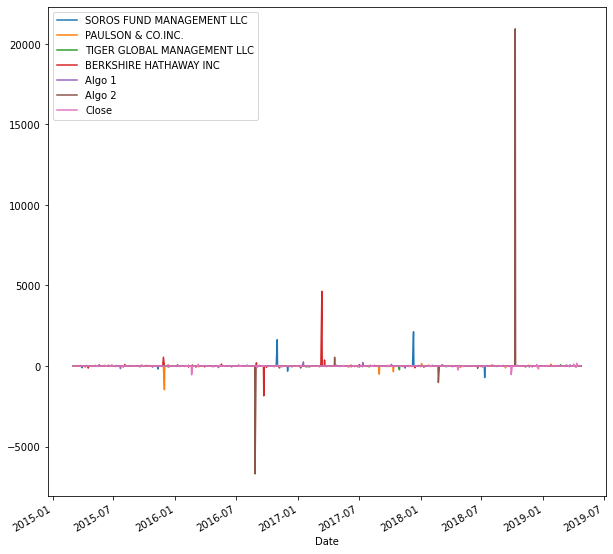

In [523]:
# Plot daily returns of all portfolios
daily_returns = combined_returns.pct_change()
daily_returns.plot(figsize=(10, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

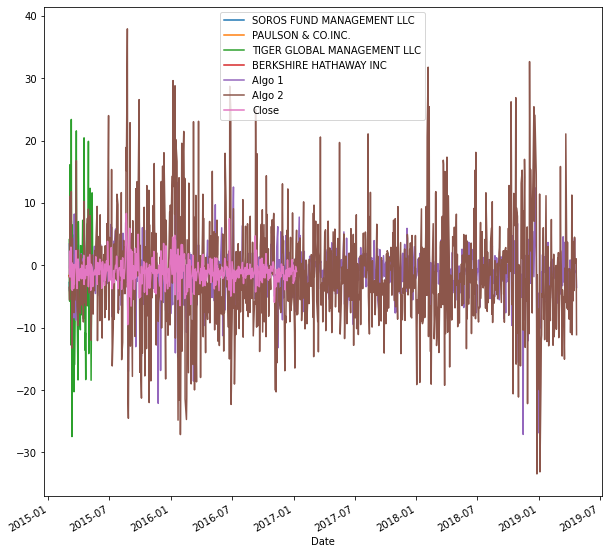

In [524]:
# Calculate cumulative returns of all portfolios
cumulative_returns_sp = (1 + daily_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns_sp.plot(figsize=(10, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

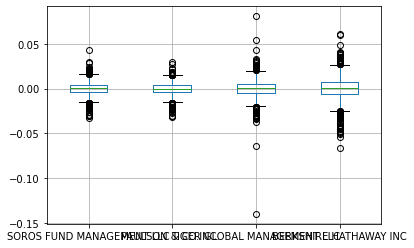

In [525]:
# Box plot to visually show risk
whale_df.boxplot()

<AxesSubplot:>

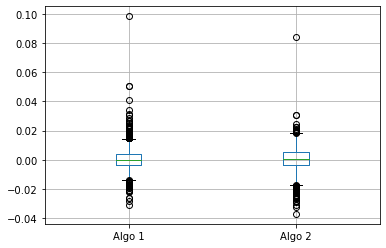

In [526]:
algo_df.boxplot()

<AxesSubplot:>

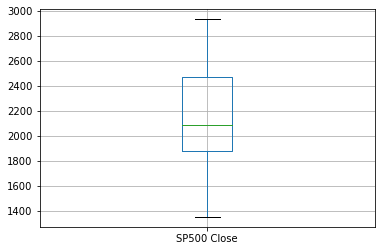

In [527]:
sp500_returns_df.boxplot()

### Calculate Standard Deviations

In [528]:
whale_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [529]:
# Calculate the daily standard deviations of all portfolios
print(f"Whales Standard Dev. is {whale_df.std()}")
print(f"Algo Standard Dev. is {algo_df.std()}")
print(f"SP500 Standard Dev. is {returns_sp.std()}")

Whales Standard Dev. is SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo Standard Dev. is Algo 1    0.007988
Algo 2    0.008466
dtype: float64
SP500 Standard Dev. is 0.008134642617809523


### Determine which portfolios are riskier than the S&P 500

In [530]:
# Calculate  the daily standard deviation of S&P 500
print(f"SP500 Standard Dev. is {returns_sp.std()}%")
# Determine which portfolios are riskier than the S&P 500
a = combined_returns.std().sort_values(ascending = True)
print (a)
print ("Tiger Global Management and Berkshire Hathawahy has a larger STD and thus a riskier portfolio than the S&P 500")

SP500 Standard Dev. is 0.008134642617809523%
PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
Close                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64
Tiger Global Management and Berkshire Hathawahy has a larger STD and thus a riskier portfolio than the S&P 500


### Calculate the Annualized Standard Deviation

In [531]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,0.069972
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.018964
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.228239
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.062370
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,0.273899


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

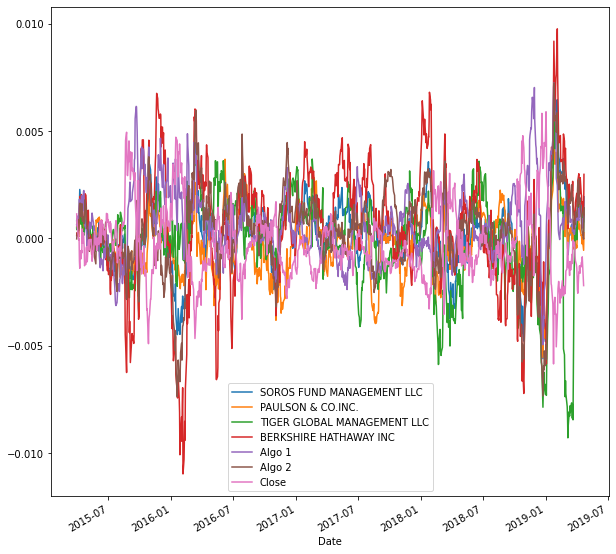

In [534]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cr_sma21 = combined_returns.rolling(window=21).mean()
# Plot the rolling standard deviation
cr_sma21.plot(figsize=(10, 10))

### Calculate and plot the correlation

<AxesSubplot:>

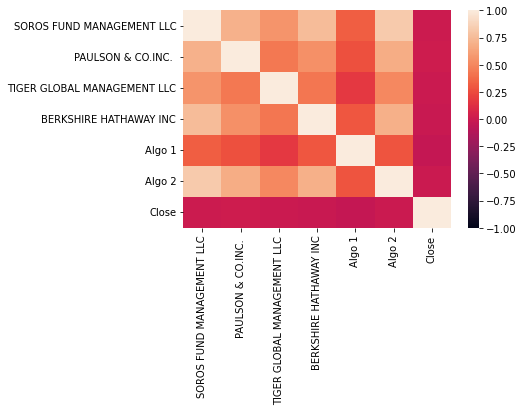

In [535]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

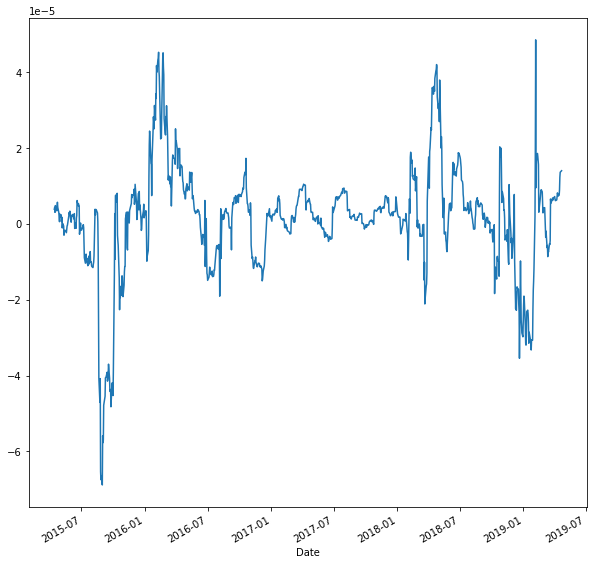

In [536]:
# Calculate covariance of a single portfolio
soros_covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_returns['Close'])
soros_covariance 
# Calculate variance of S&P 500
variance_sp = returns_sp.var()
# Computing beta
soros_beta = soros_covariance / variance_sp
# Plot beta trend
# plotted beta trend based on a 30 day rolling period
rolling_soros_covar = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(combined_returns['Close'])
rolling_soros_covar.plot(figsize= (10, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [543]:
# Use `ewm` to calculate the rolling window
soros_covar = rolling_soros_covar.ewm(halflife = 21, ignore_na= True)
soros_covar.var()

Date
2015-03-03             NaN
2015-03-04             NaN
2015-03-05             NaN
2015-03-06             NaN
2015-03-09             NaN
                  ...     
2019-04-16    1.520043e-10
2019-04-17    1.511681e-10
2019-04-18    1.510745e-10
2019-04-22    1.509906e-10
2019-04-23    1.509906e-10
Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [549]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_mean * 252) / (combined_returns_std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Close                         -0.518582
dtype: float64

<AxesSubplot:>

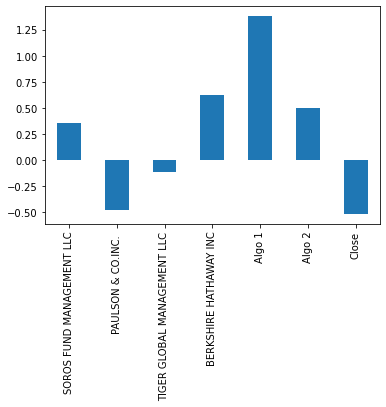

In [550]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes, the algos outperform both the whales and sp500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [551]:
# Reading data from 1st stock
goog_path = Path('goog_historical.csv')
goog_df = pd.read_csv(goog_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [554]:
# Reading data from 2nd stock
aapl_path = Path('aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path,index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.tail()

,Symbol,NOCP
Trade DATE,,
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44
2018-05-14,AAPL,188.15
2018-05-11,AAPL,188.59


In [553]:
# Reading data from 3rd stock
cost_path = Path('cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [555]:
test = pd.concat([cost_df, aapl_df, goog_df], axis = "columns", join = "inner")
test

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,COST,199.60,AAPL,186.99,GOOG,1078.59
2018-05-16,COST,198.71,AAPL,188.18,GOOG,1081.77
2018-05-15,COST,195.48,AAPL,186.44,GOOG,1079.23


In [556]:
# Combine all stocks in a single DataFrame
merged_dfs = pd.concat([cost_df, aapl_df, goog_df], axis = "columns", join = "inner")
merged_dfs

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,COST,199.60,AAPL,186.99,GOOG,1078.59
2018-05-16,COST,198.71,AAPL,188.18,GOOG,1081.77
2018-05-15,COST,195.48,AAPL,186.44,GOOG,1079.23


In [557]:
# Reset Date index
c = merged_dfs.reset_index()
c

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
1,2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2,2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
3,2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
4,2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40
...,...,...,...,...,...,...,...
245,2018-05-17,COST,199.60,AAPL,186.99,GOOG,1078.59
246,2018-05-16,COST,198.71,AAPL,188.18,GOOG,1081.77
247,2018-05-15,COST,195.48,AAPL,186.44,GOOG,1079.23
248,2018-05-14,COST,195.88,AAPL,188.15,GOOG,1100.20


In [558]:
# Reorganize portfolio data by having a column per symbol
c=c.set_index('Trade DATE')

In [559]:
c.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40


In [560]:
c = c.drop(columns = ['Symbol'])
c.columns = ['COST', 'AAPL', 'GOOG']

<AxesSubplot:xlabel='Trade DATE'>

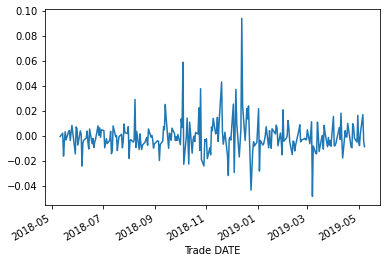

In [561]:
cost_returns = c['COST'].pct_change()
cost_returns.plot()

<AxesSubplot:xlabel='Trade DATE'>

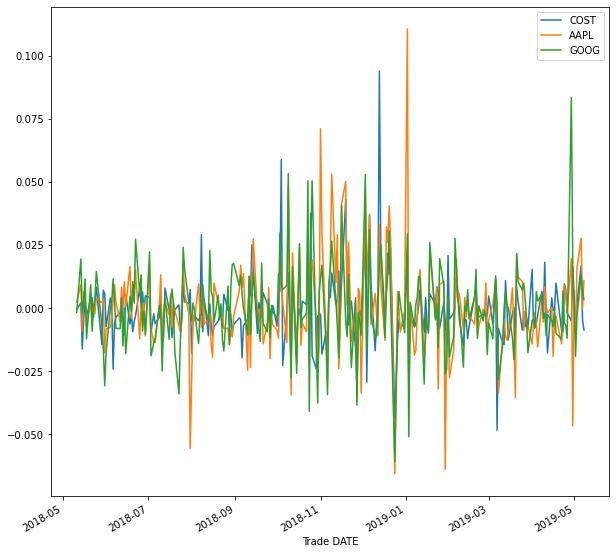

In [562]:
c = c.dropna()
# Calculate daily returns
cost_returns = c['COST'].pct_change()
aapl_returns = c['AAPL'].pct_change()
goog_returns = c['GOOG'].pct_change()

# Drop NAs -> decided to do this prior to calculating daily returns. just now concatting the 3 portfolios together in code under - i know i didnt have
# to do seperately but may want to have each individual one later

daily_returns_merged = pd.concat([cost_returns, aapl_returns, goog_returns], axis = "columns", join = "inner")

# Display sample data

daily_returns_merged.plot(figsize = (10, 10))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

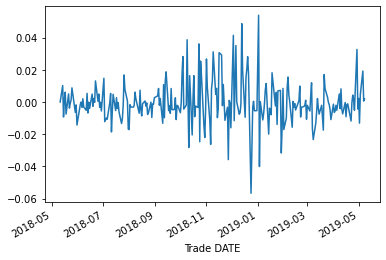

In [563]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns = daily_returns_combined.dot(weights)

# Display sample data
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [564]:
combined_dfs.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,AAPL,200.72,GOOG,1162.38
2019-05-08,COST,241.34,AAPL,202.90,GOOG,1166.27
2019-05-07,COST,240.18,AAPL,202.86,GOOG,1174.10
2019-05-06,COST,244.23,AAPL,208.48,GOOG,1189.39
2019-05-03,COST,244.62,AAPL,211.75,GOOG,1185.40


In [565]:
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [566]:
portfolio_returns

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

In [594]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([combined_returns, portfolio_returns], axis = "columns", join = "outer")
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN
...,...,...,...,...,...,...,...,...
2019-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013131
2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004642
2019-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019196
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000570


In [596]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.isnull().sum()
all_portfolios = all_portfolios.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [599]:
# Calculate the annualized `std`
annualized_std_overall = all_portfolios * np.sqrt(252)
annualized_std_overall.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close,0
2018-05-11,-0.074875,0.015590,0.041663,-0.065476,0.005676,0.004466,-0.014013,-0.000198
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.109364,0.162177
2018-05-15,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.064199,-0.147365
2018-05-16,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.013598,0.025682
2018-05-17,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,0.041896,0.097022


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

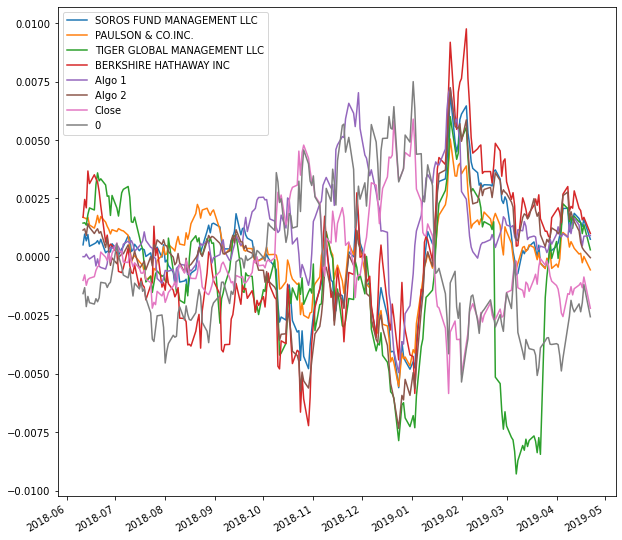

In [603]:
# Calculate rolling standard deviation
all_portfolios_rolling = all_portfolios.rolling(window=21).mean()
# Plot rolling standard deviation
all_portfolios_rolling.plot(figsize = (10,10))

### Calculate and plot the correlation

<AxesSubplot:>

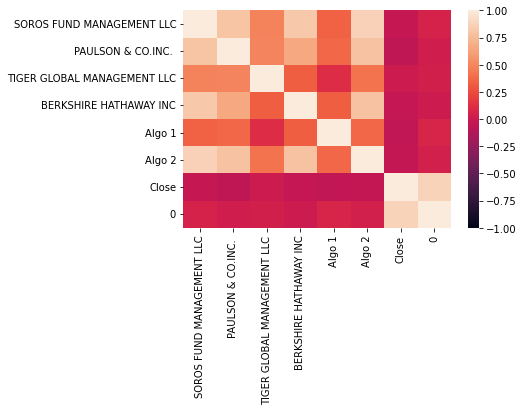

In [611]:
# Calculate and plot the correlation
all_correlation = all_portfolios.corr()
import seaborn as sns
sns.heatmap(all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

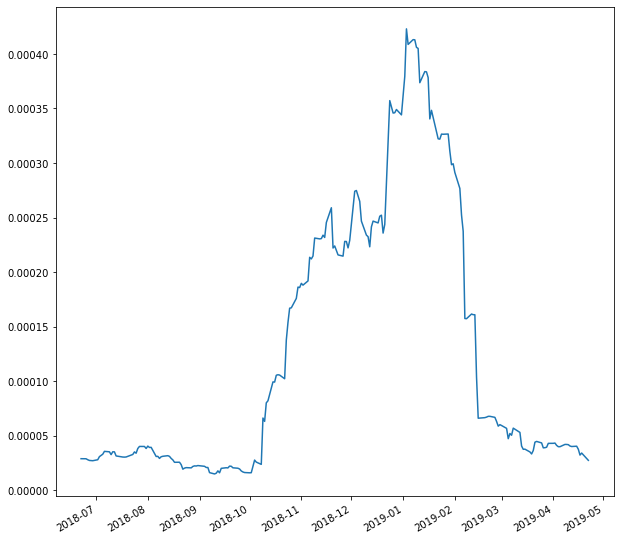

In [621]:
# Calculate and plot Beta
covar = portfolio_returns.cov(combined_returns['Close'])
beta = covar / variance_sp
rolling_beta = portfolio_returns.rolling(window=30).cov(combined_returns['Close'])
rolling_beta.plot(figsize=(10,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [719]:
a = portfolio_returns_mean() * 252

In [720]:
portfolio_returns_std_annual = daily_returns_merged.std() * 252

In [722]:
b = portfolio_returns_std_annual * np.sqrt(252)

In [723]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_myportfolio = a / b

<AxesSubplot:>

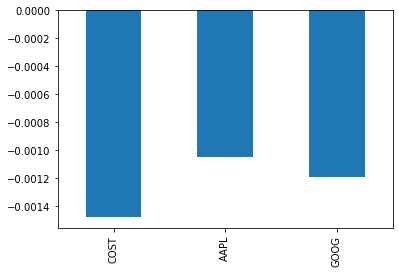

In [726]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_myportfolio.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here! 
Not good, unfortunately! All 3 stocks had a negative sharpe ratio. The above chart shoes a bar graph a sharpe ratio for the 3 stocks, however 
below shows the sharpe ratio for the entire portfolio.